[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]]


C:\Users\Daniers\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


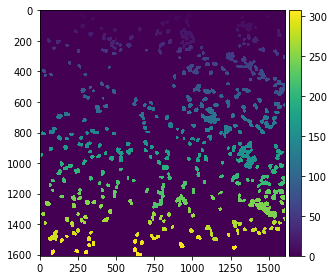

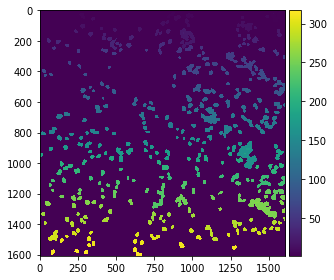

In [2]:
import numpy as np

from skimage import io
from skimage import util
from skimage import measure
from scipy import ndimage

blobs = io.imread('a-17001-40x-mac-05_gt.png')

blobs = util.invert(np.divide(blobs,255))

all_labels = measure.label(blobs,4,0)
blobs_labels = measure.label(blobs, background=255)
label_img = measure.label(blobs, connectivity=blobs.ndim)

print(blobs)
print(all_labels)
print(blobs_labels)

io.imshow(label_img)
io.show()

io.imshow(all_labels)
io.show()

io.imshow(blobs_labels)
io.show()

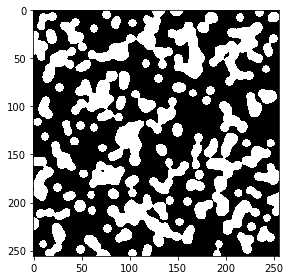

C:\Users\Daniers\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


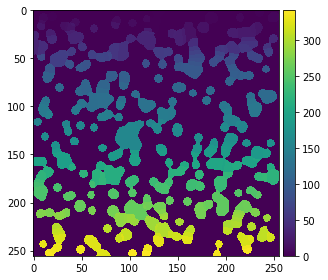

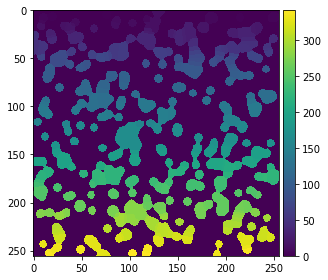

In [3]:
from skimage import io, color, filters
import numpy as np

from skimage import io
from skimage import util
from scipy import ndimage
from skimage import morphology
from skimage import segmentation
from skimage.feature import peak_local_max
from skimage.measure import regionprops
from skimage.morphology import watershed, black_tophat

n = 20
l = 256
im = np.zeros((l, l))
points = l * np.random.random((2, n ** 2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = filters.gaussian(im, sigma=l / (4. * n))
blobs = im > im.mean()

image = np.logical_or(blobs,0)

distance = ndimage.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=image)

markers = morphology.label(local_maxi)
local_ws = watershed(-distance, markers, mask=image)

all_labels = measure.label(local_ws)
blobs_labels = measure.label(local_ws, background=0)
label_img = measure.label(local_ws, connectivity=blobs.ndim)

io.imshow(blobs)
io.show()

io.imshow(blobs_labels)
io.show()

io.imshow(local_ws)
io.show()

io.imshow(local_ws==150)
io.show()